## 행렬의 미분

- 지금까지는 행렬의 원소로 스칼라 값, 즉 숫자를 사용했지만 사실 다음과 같이 함수도 행렬의 원소가 될 수 있다.
- f(x) = [[x**2, 2*x],[logx, exp(x**2)]]
- 이는 함수의 종속 변수 y가 행렬인 경우라고 볼 수 있다. 반대로 여러개의 입력을 가지는 다변수 함수는 함수의 독립 변수가 벡터(열 행렬)인 경우로 볼 수 있다. 
- f(x1,x2) = f([[x1],[x2]]) = f(x)
- 이러한 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것을 행렬 미분이라고 한다. 사실 행렬 미분은 정확하게는 미분이 아닌 편미분(partial derivative)이지만 여기에서는 편의상 미분이라고 쓰겠다. 또한 행렬 미분에는 분자 중심 표현법(Numerator-layout notation)과 분모 중심 표현법(Denominator-layout notation) 두 가지가 있는데 데이터 분석에는 주로 분모 중심 표현법(Denominator-layout notation)이 사용되므로, 여기에서는 분모 중심 표현법으로 서술한다.
- 또한, 스칼라와 벡터/행렬의 구분을 돕기 위해 이 절에 한하여 벡터/행렬은 x,A처럼 볼드체로 표기한다.

## 스칼라를 벡터로 미분하는 경우
- 데이터 분석에서는 함수의 종속 변수 y가 스칼라이고 독립 변수 x가(다차원)벡터인 다변수 함수를 사용하는 경우가 많다. 따라서 편미분 값도 여러개가 존재한다.
- 이렇게 스칼라를 벡터로 미분하는 경우에는 결과를 열 벡터로 표현한다. 이렇게 만들어진 벡터를 Gradient Vector(그레디언트 벡터)라고 하고 ∇y 로 표기한다.
- ∇y=∂y/∂x=[[∂y/∂x1], [∂y/∂x2], - - -, [∂y∂xN]]
- 예를 들어 다음과 같은 다변수 함수
- f(x, y) = 2 * x ** 2 + 6 * x * y + y * y ** 2 -26 * x -54 * y + 107
- 에 대한 그레디언트 벡터를 구하면,
- ∇f=[[∂f/∂x],[∂f/∂y]]=[[4x+6y−26], [6x+14y−54]]

#### 연습 문제 1
- 다음 함수의 그레디언트 벡터를 구하라
- 1. f(x,y,z) = x + y + z
- ∇f=[[∂f/∂x], [∂f/∂y], [∂f/∂z]] = [[1],[1],[1]] # 수업 끝나고 확인
- 2. f(x,y,z) = xyz
- ∇f=[[∂f/∂x], [∂f/∂y], [∂f/∂z]] = [[yz],[xz],[xy]] # 수업 끝나고 확인

- 그레디언트 벡터를 그림으로 나타내면 다음과 같다. 우선 2개의 독립 변수를 가지는 함수는 2차원 상에서 컨투어(contour)플롯으로 나타낼 수 있다. 이 때 각 위치에서의 그레디언트 벡터를 화살표로 표현할 수 있다. 이렇게 컨투어 플롯 위에 그레디언트 벡터를 화살표로 나타낸 플롯을 ***퀴버(quiver)플롯***이라고 한다. 퀴버 플롯에서 그레디언트 벡터는 다음과 같은 특성을 지닌다.
    - 그레디언트 벡터의 방향은 함수 곡면의 기울기가 가장 큰 방향, 즉 단위 길이당 함수 값이 가장 크게 증가하는 방향을 가리킨다.
    - 그레디언트 벡터의 방향은 등고선(isoline)의 방향과 직교한다.
    - 그레디언트 벡터의 크기는 기울기를 의미한다. 즉 벡터의 크기가 클 수록 함수 곡면의 기울기가 커진다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


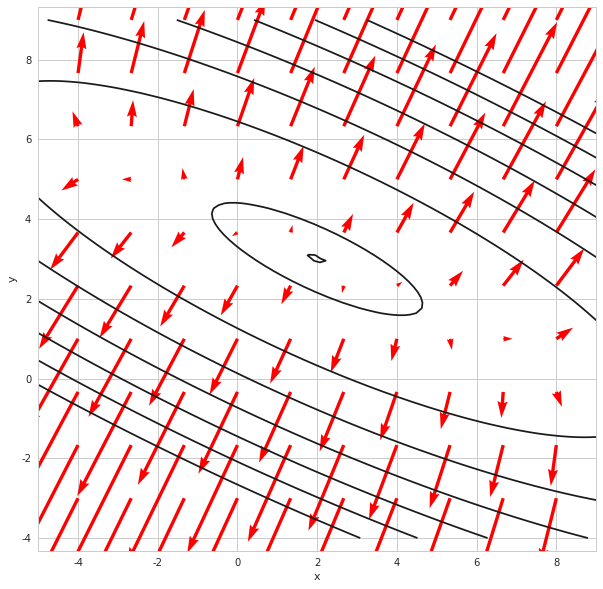

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x, y):
    return 2 * x ** 2 + 6 * x * y + 7 * y ** 2 - 26 * x - 54 * y + 107

xx = np.linspace(-5,9,100)
yy = np.linspace(-4,9,100)
X, Y = np.meshgrid(xx, yy)

Z = f(X, Y)

def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(-4, 8, 10)
yy2 = np.linspace(-3, 9, 10)
X2, Y2 = np.meshgrid(xx2, yy2)

GX = gx(X2, Y2)
GY = gy(X2, Y2)

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, levels=[0.05, 5, 50, 100, 150, 200, 250, 300], colors='k')
plt.quiver(X2, Y2, GX, GY, color='red', scale=400)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
### 위의 그림이 의미하는걸 수업중에 정확히 이해해야 할 거 같다... 

- 연습 문제 2
- 위 2차원 함수로 표현되는 지형을 상상하라. 이 지형의 어느 지점에 공을 두었다면 어떠한 경로로 공이 지나갈지 생각하여 퀴버 플롯에 경로를 그려라.

## 행렬 미분 법칙
- 다변수 함수를 미분하여 그레디언트를 구할 때는 다음 두가지 법칙이 유용하게 쓰인다

#### 벡터 미분 규칙 1: 선형 모형
- 선형 모형을 미분하면 가중치 벡터가 된다.
- ∂wTx/∂x = ∂xTw/∂x = w

#### 벡터 미분 규칙 2: 이차 형식
- 이차 형식을 미분하면 행렬과 벡터의 곱으로 나타난다.
- ∂x * T * Ax / ∂x = (A+AT) * x

- 위의 두 가지 경우는 1차 다항식과 2차 다항식에 대한 스칼라 미분과 비슷하다. 두 경우를 비교해 보면 이 공식을 외우는데 도움이 된다.

#### 스칼라 미분
1) ax - > a
2) ax**2 -> 2*a*x

#### 벡터/행렬 미분
1) wTx -> w
2) wTAx -> (A+AT)*x

## 벡터를 스칼라로 미분하는 경우
- 반대로 함수의 종속 변수 y가 (다차원) 벡터이고, 독립 변수 x가 스칼라인 경우는 함수가 여러개라고 보는 것과 마찬가지이다.
- y1 = f1(x), y2 = f2(x), - - - ,fm = fm(x) -> y = [[y1],[y2],[y3],- - -[ym]] = f(x) 

- 따라서, 미분 값도 여러 개가 존재한다. 
- 벡터를 스칼라로 미분한 경우에는 결과를 행 벡터로 표시한다.
- ∂y / ∂x = [∂y1/∂x, ∂y2/∂x, ⋯, ∂yM/∂x]

## 벡터를 벡터로 미분하는 경우
- 함수의 종속 변수와 독립 변수가 모두 벡터(다차원) 데이터인 경우에는 독립 변수 각각과 종속 변수 각각의 조합에 대해 모두 미분이 존재한다. 따라서, 도함수는 행렬 형태가 된다. 이렇게 만들어진 도함수의 행렬을 자코비안 행렬(Jacobian Matrix)이라고 한다. 자코비안 행렬을 만들때는 벡터를 스칼라로 미분하는 경우나 스칼라를 벡터를 미분하는 경우와 행/열의 방향이 다르다는 점에 유의해야한다.

#### 연습 문제 3
- 다음 함수의 자코비안 행렬을 구하라
- f(x)=[[∑Nixi],[∏Nixi]]

- 다변수 함수의 2차 도함수는 그레디언트 벡터를 독립 변수 벡터로 미분한 것이므로, 다음처럼 행렬로 나타낼 수 있다. 이러한 행렬을 헤시안 행렬 (Hessian Matrix)이라고 한다. 헤시안 행렬은 일반적으로 대칭행렬이 된다.

#### 연습 문제 4
- 다음 함수의 헤시안 행렬을 구하라
- f(x)=∑iNx2i

## 스칼라를 행렬로 미분
- 종속 변수가 스칼라 값이고 독립 변수가 행렬인 경우데ㅗ 도함수 행렬의 모양이 독립 변수 행렬 X와 같다.

## 행렬 미분 규칙 3: 행렬 곱의 대각 성분
- 두 정방 행렬을 곱해서 만들어진 행렬의 대각성분(trace)는 스칼라이다. 이 스칼라를 곱셈의 뒤 행렬로 미분하면 앞의 행렬의 전치 행렬이 나온다.
- ∂tr(BA) / ∂A = BT

## 행렬 미분 규칙 4: 행렬식의 로그
- 행렬식(determinant)는 스칼라이고 이 값의 로그 값도 스칼라이다. 이 값을 원래의 행렬로 미분하면 원래 행렬의 역행렬의 전치 행렬이 된다. 
- ∂logdetA / ∂A = (A**−1) ** T